# KNN实践

knn 又称为k近邻，是一种基于分类和回归的方法。
在给定训练集的情况下，对新的未知数据进行预测

In [4]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import matplotlib
print(matplotlib.__path__)

['/usr/local/lib/python3.7/site-packages/matplotlib']


In [64]:
np.random.seed(0)
xy1 = np.random.randn(50, 2) - 2
np.random.seed(30)
xy2 = np.random.randn(50, 2) + 2

In [65]:
x1 = xy1[:, 0],y1 = xy1[:, 1],x2 = xy2[:, 0],y2 = xy2[:, 1]

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


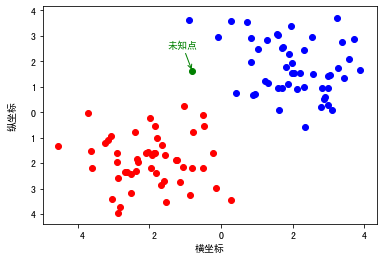

In [75]:
plt.figure('两组坐标显示')
plt.xlabel('横坐标')
plt.ylabel('纵坐标')
plt.scatter(x1, y1, c='r')
plt.scatter(x2, y2, c='b')
plt.scatter(np.array(-0.8), np.array(1.6), c='g')
plt.annotate('未知点', (-0.8, 1.6), xytext=(-1.5, 2.5), arrowprops={"arrowstyle":"->", "color":"g"}, color='g')
plt.show()

In [76]:
no_dot = np.array([-0.8, 1.6])
numpy.sqrt(numpy.sum(numpy.square(vec1 - vec2)))

In [104]:
# 利用欧氏距离计算其最近的点
def knn_neighbers(k=1):
    solution = {}
    for xy in xy1:
        solution[(xy[0], xy[1])] = np.sqrt(np.square(xy[0] - no_dot[0]) + np.square(xy[1] - no_dot[1]))
        
    for xy in xy2:
        solution[(xy[0], xy[1])] = np.sqrt(np.square(xy[0] - no_dot[0]) + np.square(xy[1] - no_dot[1]))
    
    return sorted(solution.items(), key= lambda x: x[1])[: k]
neighbors = knn_neighbers(5)

In [105]:
neighbors

[((-1.0212620158942607, 0.2408931992014578), 1.37699970067333),
 ((0.41800470795809597, 0.7568858150391833), 1.4813429709186963),
 ((-0.08389663210556275, 2.9377817100958135), 1.5173872074644081),
 ((0.8367176275386774, 1.9786649007474513), 1.679949909775263),
 ((-0.5117478062044003, -0.10411082396941684), 1.7283179764145546)]

In [107]:
neighbors = np.array([list(n[0])for n in neighbors])

In [108]:
neighbors

array([[-1.02126202,  0.2408932 ],
       [ 0.41800471,  0.75688582],
       [-0.08389663,  2.93778171],
       [ 0.83671763,  1.9786649 ],
       [-0.51174781, -0.10411082]])

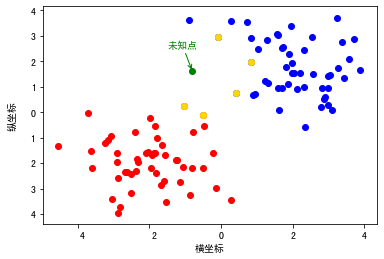

In [114]:
plt.figure('两组坐标显示')
plt.xlabel('横坐标')
plt.ylabel('纵坐标')
plt.scatter(x1, y1, c='r')
plt.scatter(x2, y2, c='b')
plt.scatter(np.array(-0.8), np.array(1.6), c='g')
plt.annotate('未知点', (-0.8, 1.6), xytext=(-1.5, 2.5), arrowprops={"arrowstyle":"->", "color":"g"}, color='g')
plt.scatter(neighbors[:, 0], neighbors[:, 1], c='gold')
plt.show()

In [117]:
from sklearn import neighbors
ones = np.ones(50)  # 定义红色点为类型 1
zeros = np.zeros(50) # 定义蓝色点为类型 0
xy1_ones = np.c_[xy1, ones]
xy2_zeros = np.c_[xy2, zeros]
xy = np.append(xy1_ones, xy2_zeros, axis=0)

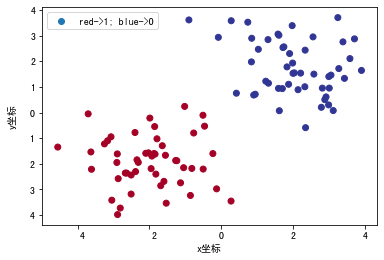

In [195]:
plt.figure('skearn-knns的使用')
plt.xlabel('x坐标')
plt.ylabel('y坐标')
plt.scatter(xy[:, 0], xy[:, 1], c=xy[:, 2], cmap='RdYlBu_r')
plt.legend(loc=2, labels=['red->1; blue->0'])
plt.show()

In [182]:
model = neighbors.KNeighborsClassifier(n_neighbors=5)
model.fit(xy[:,:2], xy[:, 2])

In [196]:
model.predict(np.array([[-0.8, 1.6]]))

array([0.])

array([0.])